**LOGISTIC REGRESSION**



2.Given a dataset named football.csv containing information about football players. Your task is to build a machine learning model to classify whether a player’s contribution type is more inclined towards being type 1 or 0, where 1 indicates players with contributions in the attacking half of the football field and 0 indicates players with contributions in the defending half of the field. The classification column is “contribu- tion type”.

**(A)**

Train a Logistic Regression model using the training data. Implement logistic regression from scratch. You’re NOT ALLOWED to use sklearn for this question

:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('football.csv')

In [7]:
X = df.drop(columns=['contribution_type','player_traits','player_tags','body_type','goalkeeping_speed','short_name','club_name','league_name','work_rate','preferred_foot'])
y = df['contribution_type']

In [8]:
X.fillna(X.mean(),inplace=True)

##TEST TRAIN SPLIT

 Before proceeding lets first shuffle the dataframe to get train, test sets to not be biased.

In [9]:
df.sample(frac = 1);

In [10]:
y_predicted=y

In [11]:
def train_test(df, split_value):
    n = int(split_value*len(df))

    X_train = df.iloc[:n, :]
    X_test =  df.iloc[n:, :]

    return X_train,X_test

X_train, X_test = train_test(df, 0.8)

* here class labels are:

In [12]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


##Logistic regression

 *  init function:

In [27]:
class LogisticRegression:

     def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

      #sigmoid function for logistic regression:
     def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

     ##function to fit training data
     def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0


        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

      #function to predict using training data
     def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]

        return y_predicted_cls

      #evaluate the model:
     def evaluate(self, X, y):
        y_predicted = self.predict(X)
        accuracy = np.mean(y_predicted == y)

        return accuracy



---



---


## (b) Make predictions on the test data using the trained model.









 * perform logistic regression:

In [28]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X, y)


<ipython-input-27-6e36823f18b4>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


* evaluate the model:

In [29]:
accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.52%


<ipython-input-27-6e36823f18b4>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))





---



---


##(c) Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s performance.



In [30]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


* **Confusion Matrix**:

   The confusion matrix is a fundamental tool for evaluating the performance of classification models. It provides a clear and detailed breakdown of how well the model's predictions align with actual class labels.

[[4226    0]
 [   0 3546]]


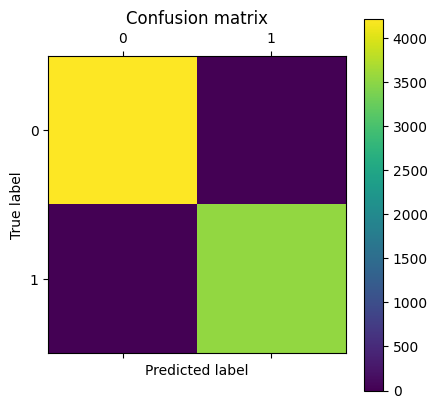

In [31]:
confusion_matrix = confusion_matrix(y, y_predicted)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

* **Accuracy Score**:

  Accuracy score provides a straightforward evaluation of model predictions, but caution is needed when dealing with imbalanced data.

In [32]:
print('Accuracy: %.2f' % accuracy_score(y, y_predicted))

Accuracy: 1.00


* **F1 SCORE**

   The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

In [33]:
f1 = f1_score(y, y_predicted)

In [34]:
print("F1 SCORE: ",f1)

F1 SCORE:  1.0
